In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [84]:
df = pd.read_csv('Group_17_data_cleaned.csv')
df.head()

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2_tCO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Dummy_Weekend,Dummy_Monday,Dummy_Saturday,Dummy_Sunday,Dummy_Thursday,Dummy_Tuesday,Dummy_Wednesday,Dummy_Maximum_Load,Dummy_Medium_Load
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0,0,0,0,0,0,0
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0,0,0,0,0,0,0
2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0,0,0,0,0,0,0
3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0,0,0,0,0,0,0
4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0,0,0,0,0,0,0


In [85]:
df_1 = df.dropna(axis=0)
df_1.head()

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2_tCO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Dummy_Weekend,Dummy_Monday,Dummy_Saturday,Dummy_Sunday,Dummy_Thursday,Dummy_Tuesday,Dummy_Wednesday,Dummy_Maximum_Load,Dummy_Medium_Load
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0,0,0,0,0,0,0
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0,0,0,0,0,0,0
2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0,0,0,0,0,0,0
3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0,0,0,0,0,0,0
4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0,0,0,0,0,0,0


In [86]:
df_1.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2_tCO2',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'Dummy_Weekend', 'Dummy_Monday', 'Dummy_Saturday', 'Dummy_Sunday',
       'Dummy_Thursday', 'Dummy_Tuesday', 'Dummy_Wednesday',
       'Dummy_Maximum_Load', 'Dummy_Medium_Load'],
      dtype='object')

In [87]:
df_1.corr()

<ipython-input-87-e6c3a4301a77>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_1.corr()


,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2_tCO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Dummy_Weekend,Dummy_Monday,Dummy_Saturday,Dummy_Sunday,Dummy_Thursday,Dummy_Tuesday,Dummy_Wednesday,Dummy_Maximum_Load,Dummy_Medium_Load
Usage_kWh,1.000000,0.896150,-0.324922,0.897506,0.385951,0.353566,2.346103e-01,-2.954748e-01,7.094848e-02,-1.397640e-01,-2.418142e-01,9.415031e-02,8.580839e-02,5.932045e-02,0.487792,0.204521
Lagging_Current_Reactive_Power_kVarh,0.896150,1.000000,-0.405142,0.803310,0.144465,0.407716,8.266237e-02,-3.198698e-01,7.762676e-02,-1.681174e-01,-2.449646e-01,1.080202e-01,8.936468e-02,6.074775e-02,0.412859,0.052157
Leading_Current_Reactive_Power_kVarh,-0.324922,-0.405142,1.000000,-0.327122,0.526837,-0.944039,3.716046e-01,2.604306e-01,-7.378556e-02,1.283536e-01,2.079683e-01,-8.254759e-02,-7.475230e-02,-3.591587e-02,-0.155255,0.284623
CO2_tCO2,0.897506,0.803310,-0.327122,1.000000,0.375225,0.356424,2.336069e-01,-2.782795e-01,7.513261e-02,-1.258422e-01,-2.335298e-01,8.181058e-02,7.864645e-02,5.462051e-02,0.486870,0.191235
Lagging_Current_Power_Factor,0.385951,0.144465,0.526837,0.375225,1.000000,-0.520468,5.651872e-01,5.401221e-02,-2.096863e-02,3.546743e-02,3.428431e-02,-2.194929e-02,-1.077496e-02,-1.161453e-04,0.282243,0.408215
Leading_Current_Power_Factor,0.353566,0.407716,-0.944039,0.356424,-0.520468,1.000000,-3.605630e-01,-3.146749e-01,8.498750e-02,-1.340918e-01,-2.722815e-01,9.978148e-02,8.664053e-02,4.796600e-02,0.190842,-0.212413
NSM,0.234610,0.082662,0.371605,0.233607,0.565187,-0.360563,1.000000e+00,-9.027984e-17,1.006732e-16,-6.184321e-17,-8.314443e-17,1.192499e-17,-1.642403e-17,-1.246392e-17,0.211061,0.472706
Dummy_Weekend,-0.295475,-0.319870,0.260431,-0.278279,0.054012,-0.314675,-9.027984e-17,1.000000e+00,-2.601699e-01,6.457034e-01,6.457034e-01,-2.572918e-01,-2.572918e-01,-2.572918e-01,-0.117243,-0.141707
Dummy_Monday,0.070948,0.077627,-0.073786,0.075133,-0.020969,0.084988,1.006732e-16,-2.601699e-01,1.000000e+00,-1.679926e-01,-1.679926e-01,-1.679926e-01,-1.679926e-01,-1.679926e-01,0.028777,0.034781
Dummy_Saturday,-0.139764,-0.168117,0.128354,-0.125842,0.035467,-0.134092,-6.184321e-17,6.457034e-01,-1.679926e-01,1.000000e+00,-1.661342e-01,-1.661342e-01,-1.661342e-01,-1.661342e-01,-0.024968,-0.030178


In [88]:
# Removing highly correlated features with correlation coefficient greater than 0.85 
# Co_ppm,Co_ppm-1,Co_ppm-2 are correlated to each other with coefficient greater than 0.97
# In the same all remaining columns with repsective -1,-2 are correalted with each other.
# Representing all of them with only one variable.

In [89]:
df_1.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2_tCO2',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'Dummy_Weekend', 'Dummy_Monday', 'Dummy_Saturday', 'Dummy_Sunday',
       'Dummy_Thursday', 'Dummy_Tuesday', 'Dummy_Wednesday',
       'Dummy_Maximum_Load', 'Dummy_Medium_Load'],
      dtype='object')

## considering Usage_kWh as target variable

In [90]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# convert date/time strings to timestamps
df_1['date'] = pd.to_datetime(df_1['date'])
df_1['date'] = df_1['date'].astype('int64') // 10**9  # convert to seconds

# extract feature matrix X and target vector y
X = df_1.drop('Usage_kWh', axis=1)
y = df_1['Usage_kWh']

# scale the feature matrix
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)
scaled_y=scaler.fit_transform(y.values.reshape(-1, 1))

In [91]:
#splitting data into train,validation and test datasets
X_train, X_rem, y_train, y_rem = train_test_split(scaled_X,scaled_y, train_size=0.34,random_state=42)

In [92]:
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5,random_state=42)

In [93]:
# shapes of train,validation and  test split
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(11913, 16)
(11913, 1)
(11563, 16)
(11563, 1)
(11564, 16)
(11564, 1)


(None, None)

### best model from part-2

In [94]:
# Linear Regression came as best model in part 2

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [96]:
best_reg = LinearRegression(copy_X= True, fit_intercept= True)
best_reg.fit(X_train,y_train)

LinearRegression()

In [97]:
# best model on validation dataset
y_valid_pred = best_reg.predict(X_valid)
MSE = metrics.mean_squared_error(y_valid_pred, y_valid)
MAE =  metrics.mean_absolute_error(y_valid_pred, y_valid)
RMSE = MSE**0.5
score = metrics.r2_score(y_valid_pred,y_valid)
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")
print(f"The regression score is {score}")

The mean squared error is 0.003236912159141072
The mean absolute error is 0.0371223549785833
The root mean sqaured error is 0.05689386750029455
The regression score is 0.9235908519245246


In [98]:
# model on test dataset
y_test_pred = best_reg.predict(X_test)
MSE = metrics.mean_squared_error(y_test_pred, y_test)
MAE =  metrics.mean_absolute_error(y_test_pred, y_test)
r2_score = metrics.r2_score(y_test_pred,y_test)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")
print(f"The regression score is {r2_score}")


The mean squared error is 0.003069472964422499
The mean absolute error is 0.0368193515230474
The root mean sqaured error is 0.05540282451664806
The regression score is 0.9272965511939364


# Feature Selection using Lasso

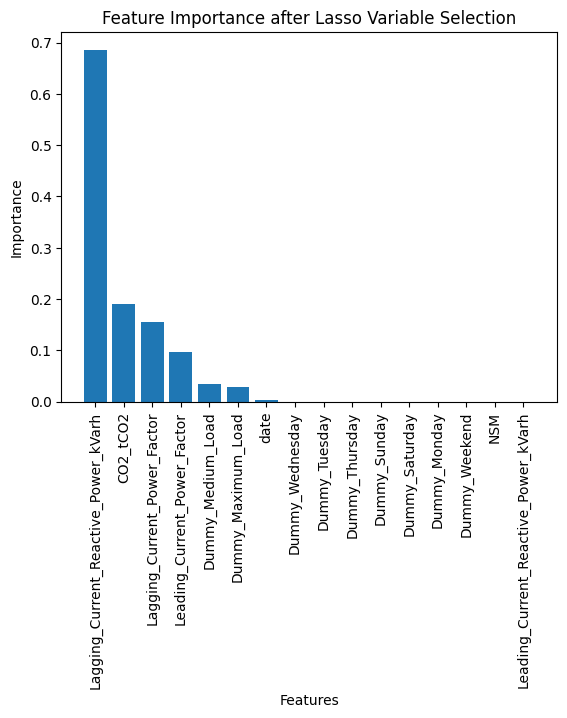

In [111]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

# Fit Lasso model with the best alpha value
lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = abs(lasso_model.coef_)

# Sort feature importances in descending order
sorted_idx = feature_importances.argsort()[::-1]

# Plot feature importances
plt.bar(range(X_train.shape[1]), feature_importances[sorted_idx])
plt.xticks(range(X_train.shape[1]), X.columns[sorted_idx], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance after Lasso Variable Selection")
plt.show()


In [113]:

# Get top 7 features
top_features = list(X.columns[sorted_idx][:7])
print("Top 7 features:", top_features)


Top 7 features: ['Lagging_Current_Reactive_Power_kVarh', 'CO2_tCO2', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'Dummy_Medium_Load', 'Dummy_Maximum_Load', 'date']


In [116]:
df_1=df[['Lagging_Current_Reactive_Power_kVarh', 'CO2_tCO2', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'Dummy_Medium_Load', 'Dummy_Maximum_Load', 'date','Usage_kWh']]

In [117]:
df_1.head()

,Lagging_Current_Reactive_Power_kVarh,CO2_tCO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,Dummy_Medium_Load,Dummy_Maximum_Load,date,Usage_kWh
0,2.95,0.0,73.21,100.0,0,0,2018-01-01 00:15:00,3.17
1,4.46,0.0,66.77,100.0,0,0,2018-01-01 00:30:00,4.00
2,3.28,0.0,70.28,100.0,0,0,2018-01-01 00:45:00,3.24
3,3.56,0.0,68.09,100.0,0,0,2018-01-01 01:00:00,3.31
4,4.50,0.0,64.72,100.0,0,0,2018-01-01 01:15:00,3.82


In [118]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# convert date/time strings to timestamps
df_1['date'] = pd.to_datetime(df_1['date'])
df_1['date'] = df_1['date'].astype('int64') // 10**9  # convert to seconds

# extract feature matrix X and target vector y
X = df_1.drop('Usage_kWh', axis=1)
y = df_1['Usage_kWh']

# scale the feature matrix
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)
scaled_y=scaler.fit_transform(y.values.reshape(-1, 1))

<ipython-input-118-55a5bc854004>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['date'] = pd.to_datetime(df_1['date'])
<ipython-input-118-55a5bc854004>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['date'] = df_1['date'].astype('int64') // 10**9  # convert to seconds


In [119]:
#splitting data into train,validation and test datasets
X_train, X_rem, y_train, y_rem = train_test_split(scaled_X,scaled_y, train_size=0.34,random_state=42)

In [120]:
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5,random_state=42)

In [121]:
# shapes of train,validation and  test split
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(11913, 7)
(11913, 1)
(11563, 7)
(11563, 1)
(11564, 7)
(11564, 1)


(None, None)

# Running Best Models on Features Selected on Part-2


In [122]:
X_train.shape

(11913, 7)

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [124]:
best_reg = LinearRegression(copy_X= True, fit_intercept= True)
best_reg.fit(X_train,y_train)

LinearRegression()

In [125]:
# best model on validation dataset
y_valid_pred = best_reg.predict(X_valid)
MSE = metrics.mean_squared_error(y_valid_pred, y_valid)
MAE =  metrics.mean_absolute_error(y_valid_pred, y_valid)
RMSE = MSE**0.5
score = metrics.r2_score(y_valid_pred,y_valid)
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")
print(f"The regression score is {score}")

The mean squared error is 0.0032451084645944385
The mean absolute error is 0.037327621959110616
The root mean sqaured error is 0.056965853496585464
The regression score is 0.9233621431077759


In [126]:
# model on test dataset
y_test_pred = best_reg.predict(X_test)
MSE = metrics.mean_squared_error(y_test_pred, y_test)
MAE =  metrics.mean_absolute_error(y_test_pred, y_test)
r2_score = metrics.r2_score(y_test_pred,y_test)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")
print(f"The regression score is {r2_score}")


The mean squared error is 0.003081835865752941
The mean absolute error is 0.03705373188997071
The root mean sqaured error is 0.055514285240404034
The regression score is 0.9269972780421948


### best model from part-3

In [127]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score

In [128]:
best_model_linear = SVR(kernel="linear",C=0.1)
best_model_linear.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=0.1, kernel='linear')

In [129]:
# best model on validation dataset
y_valid_pred = best_model_linear.predict(X_valid)
MSE = metrics.mean_squared_error(y_valid_pred, y_valid)
MAE =  metrics.mean_absolute_error(y_valid_pred, y_valid)
RMSE = MSE**0.5
score = metrics.r2_score(y_valid_pred,y_valid)
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")
print(f"The regression score is {score}")

The mean squared error is 0.0045398655790973574
The mean absolute error is 0.056008922512234126
The root mean sqaured error is 0.06737852461353956
The regression score is 0.9115189034009474


In [130]:
# model on test dataset
y_test_pred = best_model_linear.predict(X_test)
MSE = metrics.mean_squared_error(y_test_pred, y_test)
MAE =  metrics.mean_absolute_error(y_test_pred, y_test)
r2_score = metrics.r2_score(y_test_pred,y_test)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")
print(f"The regression score is {r2_score}")


The mean squared error is 0.0044182638565932394
The mean absolute error is 0.055635170659262795
The root mean sqaured error is 0.06647002224005374
The regression score is 0.9133189608877845


In [131]:
from prettytable import PrettyTable

# Create a new table object
table = PrettyTable()

# Add columns to the table
table.field_names = ["Model", "Mean Squared Error", "Mean Absolute Error", "Root Mean Squared Error", "Regression Score"]

# Add rows to the table
table.add_row(["SVC with Variable Selection", 0.004418, 0.055635, 0.066470, 0.913319])
table.add_row(["Linear Regression with Variable Selection", 0.003082, 0.037054, 0.055514, 0.926997])
table.add_row(["SVC without Variable Selection", 0.005169, 0.058825, 0.071896, 0.916750])
table.add_row(["Linear Regression without Variable Selection", 0.003069, 0.036819, 0.055403, 0.927297])

# Set the alignment of the columns
table.align = "l"

# Print the table
print(table)


+----------------------------------------------+--------------------+---------------------+-------------------------+------------------+
| Model                                        | Mean Squared Error | Mean Absolute Error | Root Mean Squared Error | Regression Score |
+----------------------------------------------+--------------------+---------------------+-------------------------+------------------+
| SVC with Variable Selection                  | 0.004418           | 0.055635            | 0.06647                 | 0.913319         |
| Linear Regression with Variable Selection    | 0.003082           | 0.037054            | 0.055514                | 0.926997         |
| SVC without Variable Selection               | 0.005169           | 0.058825            | 0.071896                | 0.91675          |
| Linear Regression without Variable Selection | 0.003069           | 0.036819            | 0.055403                | 0.927297         |
+----------------------------------------